# Project 2: Billboard Hits

## 1. Problem statement

## 2. Importing relevant libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 3. Loading the data

In [68]:
df = pd.read_csv('assets/billboard.csv', na_values='*')

In [69]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Assumptions taken

## 5. Cleaning the data

### a. Is the column 'year' useful?

In [70]:
df['year'].value_counts()

2000    317
Name: year, dtype: int64

**There's only one value in the column so it wouldn't help much.**

### b. Cleaning artist name column

In [71]:
names = df['artist.inverted'].unique()

In [72]:
print sorted(names)

['2 Pac', '2Ge+her', '3 Doors Down', '504 Boyz', '98\xa1', 'A*Teens', 'Aaliyah', 'Adams, Yolanda', 'Adkins, Trace', 'Aguilera, Christina', 'Alice Deejay', 'Allan, Gary', 'Amber', 'Anastacia', 'Anthony, Marc', 'Avant', 'BBMak', 'Backstreet Boys, The', 'Badu, Erkyah', 'Baha Men', 'Barenaked Ladies', 'Beenie Man', 'Before Dark', 'Bega, Lou', 'Big Punisher', 'Black Rob', 'Black, Clint', 'Blaque', 'Blige, Mary J.', 'Blink-182', 'Bloodhound Gang', 'Bon Jovi', 'Braxton, Toni', 'Brock, Chad', 'Brooks & Dunn', 'Brooks, Garth', 'Byrd, Tracy', 'Cagle, Chris', "Cam'ron", 'Carey, Mariah', 'Carter, Aaron', 'Carter, Torrey', 'Changing Faces', 'Chesney, Kenny', 'Clark Family Experience', 'Clark, Terri', 'Common', 'Counting Crows', 'Creed', 'Cyrus, Billy Ray', "D'Angelo", 'DMX', 'Da Brat', 'Davidson, Clay', 'De La Soul', "Destiny's Child", 'Diffie, Joe', 'Dion, Celine', 'Dixie Chicks, The', 'Dr. Dre', 'Drama', 'Dream', 'Eastsidaz, The', 'Eiffel 65', 'Elliott, Missy "Misdemeanor"', 'Eminem', 'En Vogue',

**Seems like the names are in order (I tried to look through everything) and no further cleaning is required at the moment.**

### c. What about the column 'time'?

It looks like it refers to the length of the track. Let's format it to return length of the track in seconds.

Each value seems to be formatted: m,s,ms. For the purposes of this project, we will drop the millisecond(ms).

In [73]:
def get_sec(x):
    x_list = x.split(',')
    return int(x_list[0]) * 60 + int(x_list[1])


In [74]:
df['track_length_seconds'] = df['time'].map(get_sec)

In [75]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218


### d. Cleaning the 'genre' column

In [76]:
genres = df['genre'].unique()

In [77]:
print sorted(genres)

['Country', 'Electronica', 'Gospel', 'Jazz', 'Latin', 'Pop', 'R & B', 'R&B', 'Rap', 'Reggae', 'Rock', "Rock'n'roll"]


In [78]:
def clean_genre(x):
    if x == 'R & B':
        return 'R&B'
    elif x == "Rock'n'roll":
        return 'Rock'
    else:
        return x

In [79]:
df['genre_clean'] = df['genre'].map(clean_genre)

In [80]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds,genre_clean
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,Rock
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,Rock
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,Rock
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,Rock
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,Rock


### e. Formatting the columns 'date.entered' and 'date.peaked'

In [81]:
df['date_entered'] = df['date.entered'].map(pd.to_datetime)
df['date_peaked'] = df['date.peaked'].map(pd.to_datetime)

In [82]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds,genre_clean,date_entered,date_peaked
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,218,Rock,2000-09-23,2000-11-18
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,258,Rock,2000-02-12,2000-04-08
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,247,Rock,1999-10-23,2000-01-29
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,225,Rock,2000-08-12,2000-09-16
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,218,Rock,2000-08-05,2000-10-14


Let's add a column that shows the number of days a track remained on Billboards.

In [83]:
df['weeks_to_peak'] = df['date_peaked'] - df['date_entered']

In [84]:
def get_days(x):
    y = str(x).split()
    return float(y[0])/7.

In [85]:
df['weeks_to_peak'] = df['weeks_to_peak'].map(get_days)

In [86]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds,genre_clean,date_entered,date_peaked,weeks_on_billboards
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,218,Rock,2000-09-23,2000-11-18,8.0
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,258,Rock,2000-02-12,2000-04-08,8.0
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,247,Rock,1999-10-23,2000-01-29,14.0
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,225,Rock,2000-08-12,2000-09-16,5.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,218,Rock,2000-08-05,2000-10-14,10.0


### f. What about the columns starting with 'x'?

#### What do they even mean?

In [88]:
df.dropna(how='all', axis=1, inplace=True)

In [89]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,track_length_seconds,genre_clean,date_entered,date_peaked,weeks_on_billboards
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,218,Rock,2000-09-23,2000-11-18,8.0
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,258,Rock,2000-02-12,2000-04-08,8.0
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,247,Rock,1999-10-23,2000-01-29,14.0
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,225,Rock,2000-08-12,2000-09-16,5.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,218,Rock,2000-08-05,2000-10-14,10.0


**Some of the weeks were totally empty! So we got rid of them.**

It seems like these columns contain the rank of the track if it was currently on the Top 100 Billboards and a null value if it was no longer within the Top 100 Billboards.

### 5. What can we see from the data

In [93]:
df[['weeks_to_peak','track_length_seconds']].describe()

,weeks_on_billboards,track_length_seconds
count,317.000000,317.000000
mean,7.463722,242.425868
std,5.838229,42.401618
min,0.000000,156.000000
25%,3.000000,219.000000
50%,7.000000,236.000000
75%,10.000000,257.000000
max,45.000000,470.000000


Although there are other columns with numerical data, only the above 2 columns actually refer to a component of the data that is continuous.

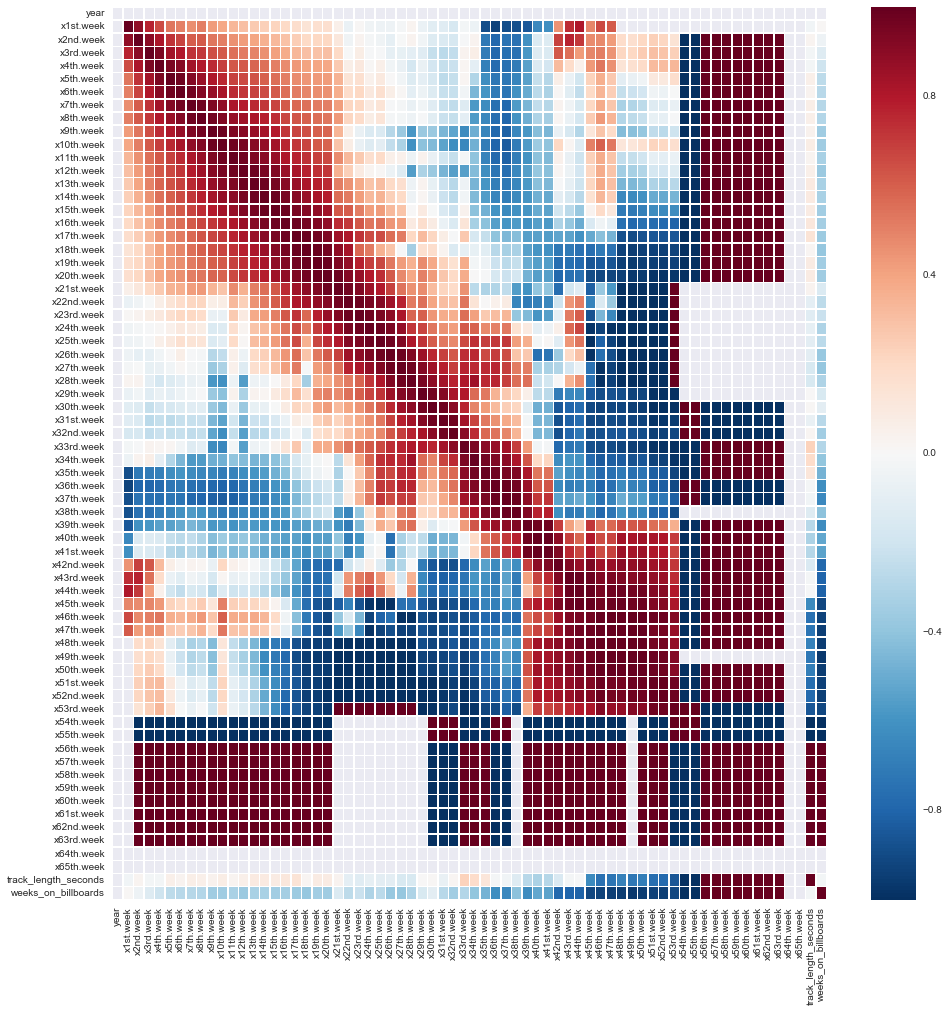

In [101]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), linewidths=.5, ax= ax);